In [1]:
# Import libraries

#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, Normalizer, FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

#models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgbm
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train data
train = pd.read_csv('/content/drive/MyDrive/Colabs/Competitions/Zindi/DSN_Bootcamp/data/train (1).csv')
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [3]:
#import test data
test = pd.read_csv('/content/drive/MyDrive/Colabs/Competitions/Zindi/DSN_Bootcamp/data/test (2).csv')
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [4]:
train.shape

(4990, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


# Data Cleaning

In [7]:
# check for missing data

train.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,1450


In [8]:
test.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,661
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,959


In [9]:
train.fillna({'Item_Weight': train['Item_Weight'].median()}, inplace=True)
train['Store_Size'].fillna(method='bfill', inplace=True)
train.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0


In [10]:
test.fillna({'Item_Weight': train['Item_Weight'].median()}, inplace=True)
test['Store_Size'].fillna(method='bfill', inplace=True)
test.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0


# Exploratory Data Analysis

In [11]:
num_cols = [col for col in train.columns if train[col].dtype != 'O']
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_Price',
 'Store_Start_Year',
 'Item_Store_Returns']

In [12]:
cat_cols = [col for col in train.columns if train[col].dtype == 'O']
cat_cols

['Item_ID',
 'Store_ID',
 'Item_Store_ID',
 'Item_Sugar_Content',
 'Item_Type',
 'Store_Size',
 'Store_Location_Type',
 'Store_Type']

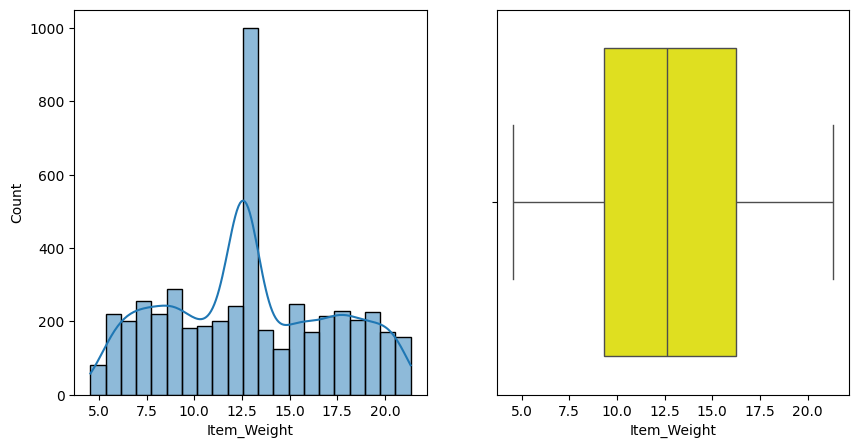

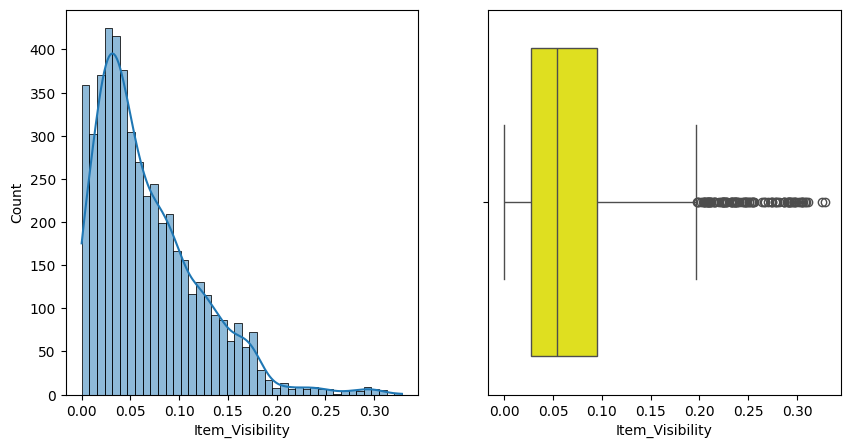

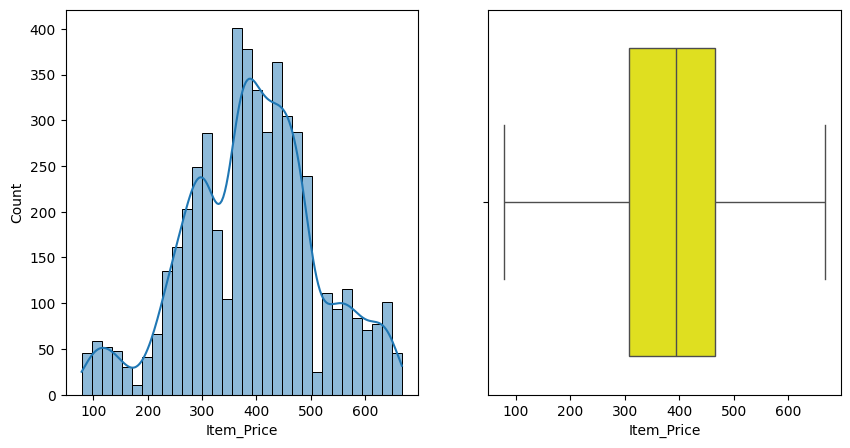

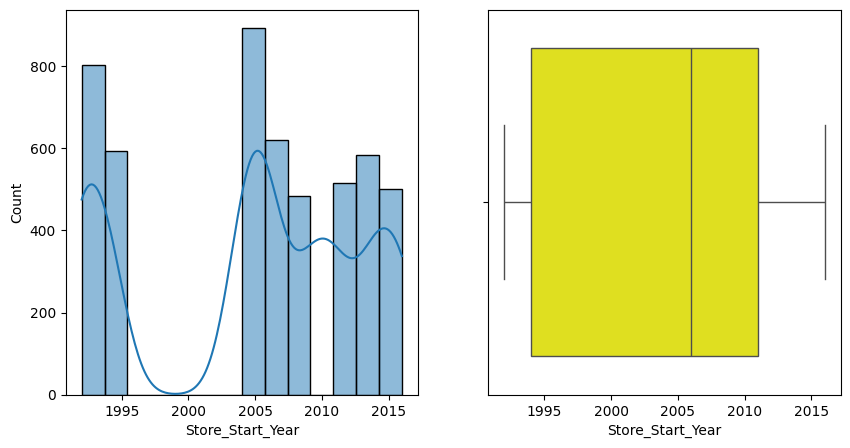

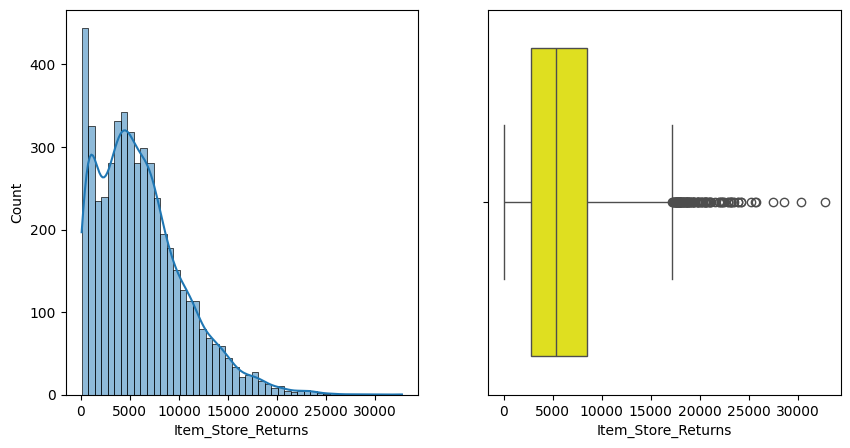

In [13]:
# ploting the distribution of numerical columns
for i in num_cols:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(train[i], kde=True, ax=ax1)
  sns.boxplot(x=train[i], color='yellow', ax=ax2)
  plt.show()

In [14]:
cat_cols= ['Item_Sugar_Content', 'Item_Type','Store_Size', 'Store_Location_Type', 'Store_Type']

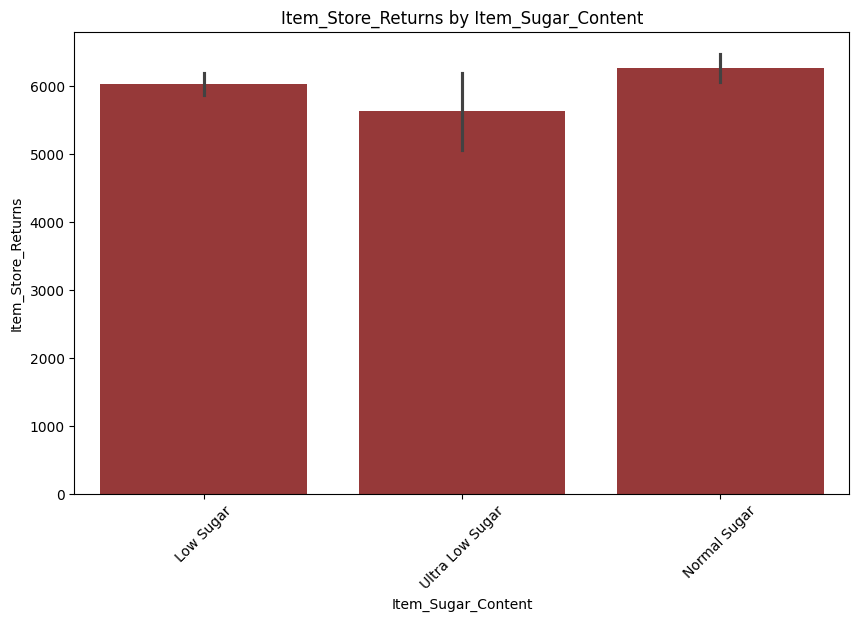

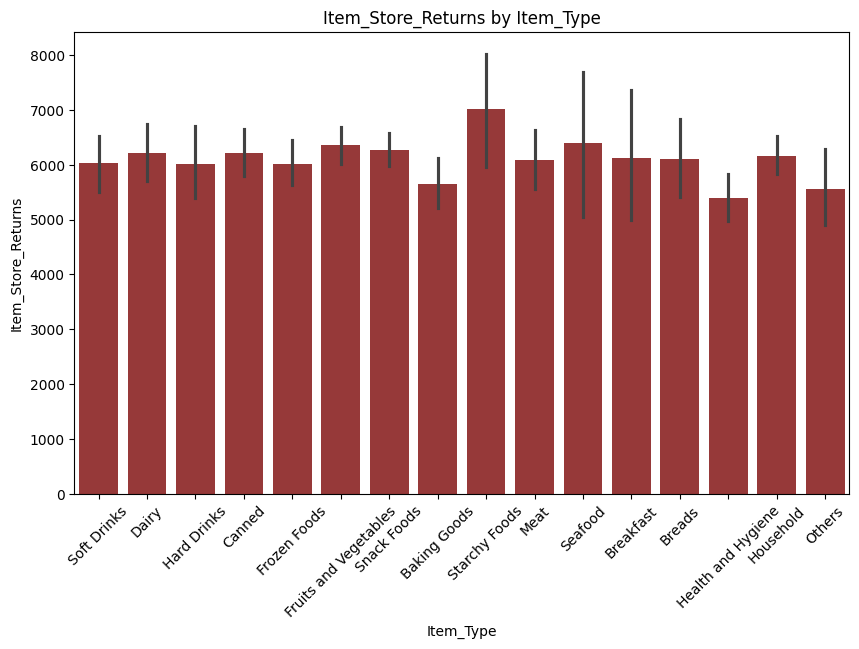

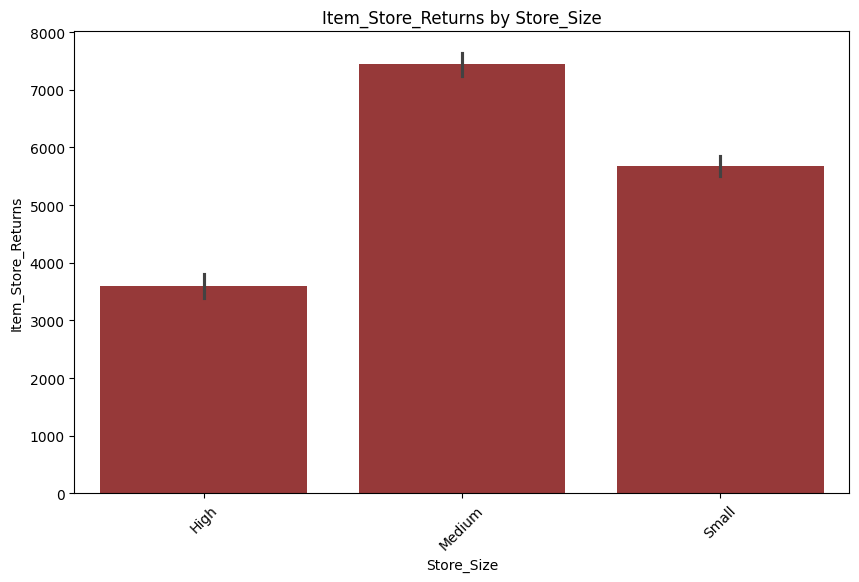

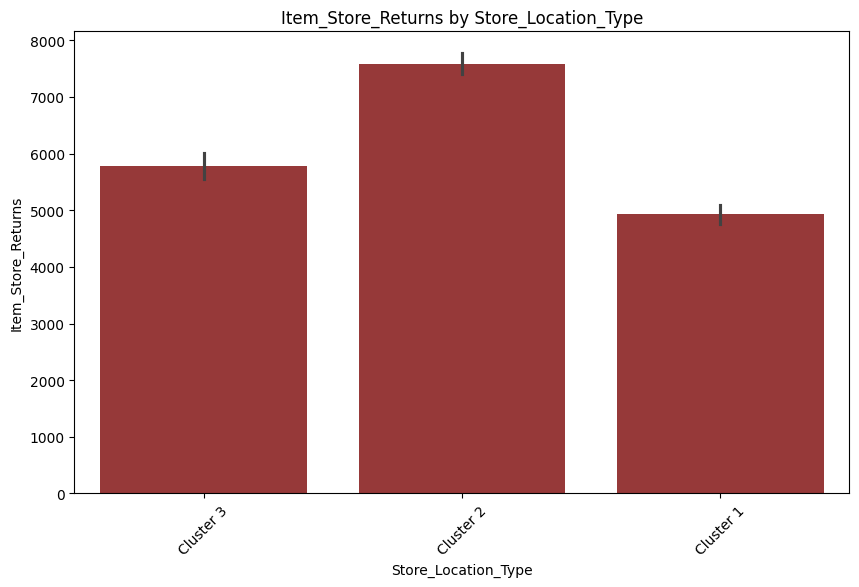

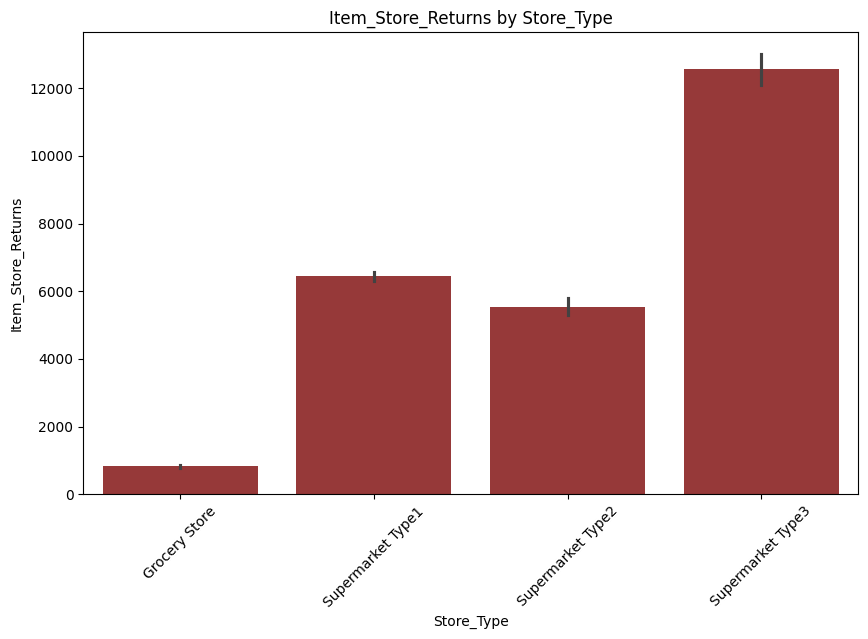

In [15]:
for col in cat_cols:
  plt.figure(figsize=(10, 6))
  sns.barplot(x=col, y='Item_Store_Returns', data=train, color='brown')
  plt.title(f'Item_Store_Returns by {col}')
  plt.xticks(rotation=45)
  plt.show()

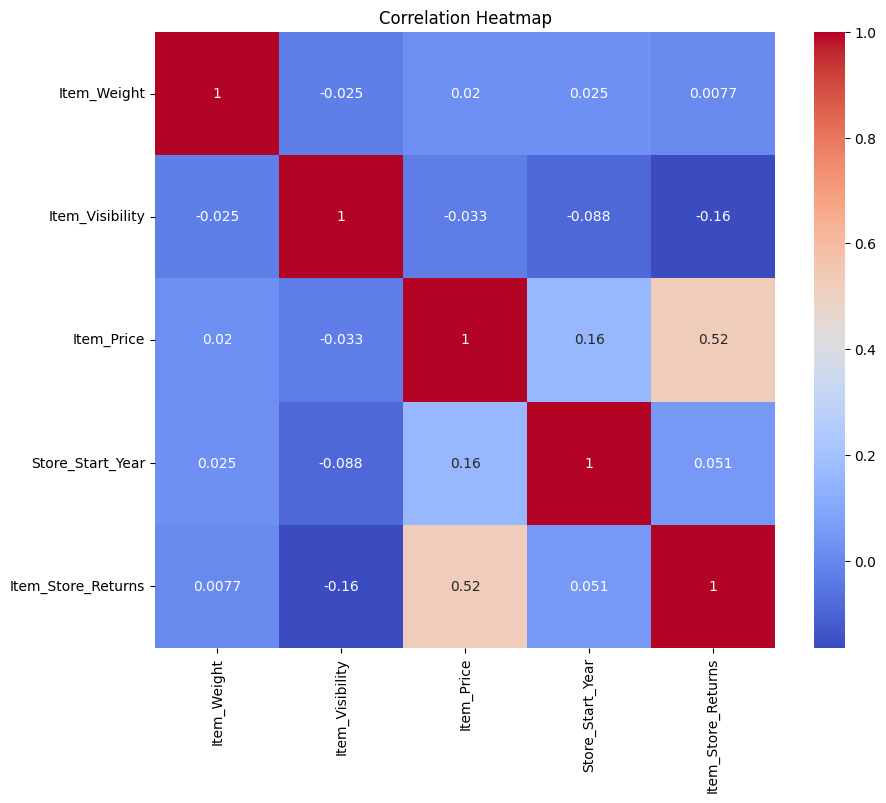

In [16]:
corr = train[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


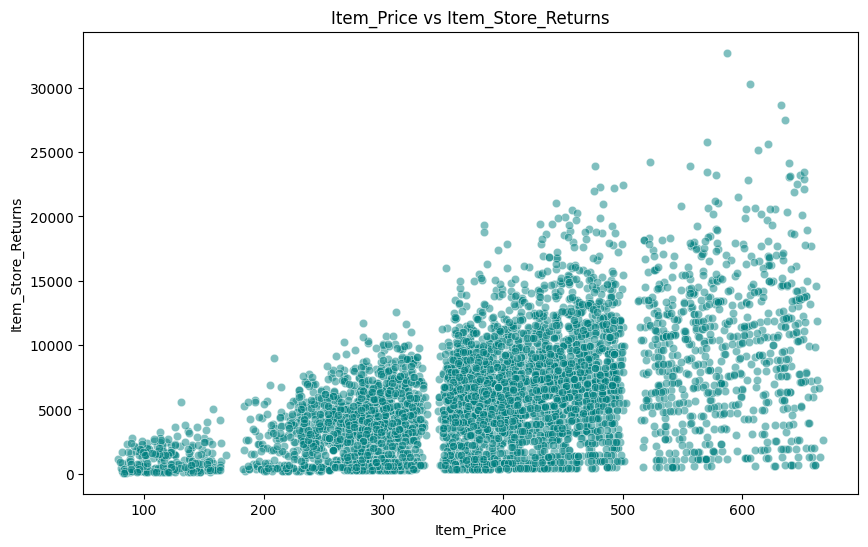

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Price', y='Item_Store_Returns', data=train,  alpha=0.5, color='teal')
plt.title('Item_Price vs Item_Store_Returns')
plt.show()

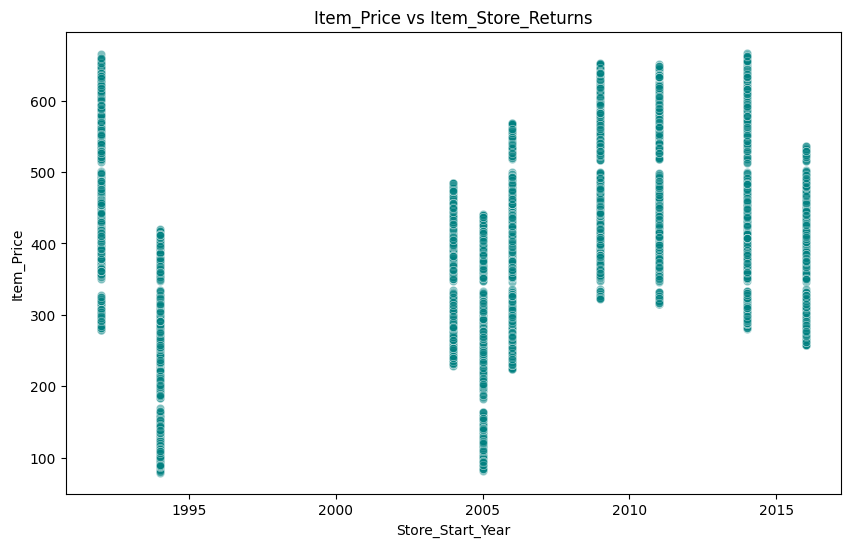

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Start_Year', y='Item_Price', data=train,  alpha=0.5, color='teal')
plt.title('Item_Price vs Item_Store_Returns')
plt.show()

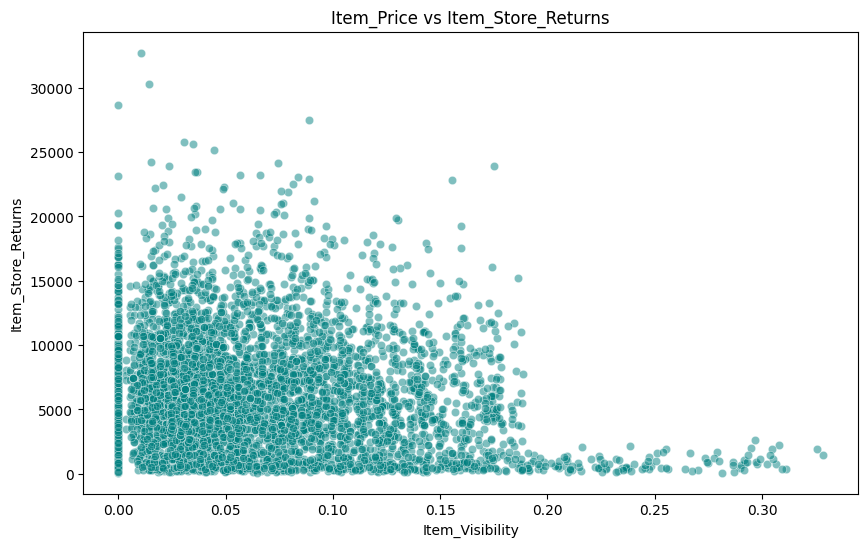

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Store_Returns', data=train,  alpha=0.5, color='teal')
plt.title('Item_Price vs Item_Store_Returns')
plt.show()

# Data Preprocessing

In [20]:
ohe_features = ['Item_Sugar_Content', 'Store_Size', 'Store_Location_Type', 'Store_Type']

ord_features = ['Item_Type']

num_cols = ['Item_Weight', 'Item_Visibility', 'Item_Price'] #'Store_Start_Year']

In [21]:
#score dataset and remove outliers
z_scores_test = np.abs(zscore(test[num_cols]))
no_outliers_test = (z_scores_test < 4).all(axis=1)
test[num_cols] = test[num_cols][no_outliers_test]
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,High,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,High,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [22]:
#score dataset and remove outliers
z_scores = np.abs(zscore(train[num_cols]))
no_outliers = (z_scores < 4).all(axis=1)
train[num_cols] = train[num_cols][no_outliers]
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [23]:
train.isnull().sum()


,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,27
Item_Sugar_Content,0
Item_Visibility,27
Item_Type,0
Item_Price,27
Store_Start_Year,0
Store_Size,0


In [24]:
test.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,10
Item_Sugar_Content,0
Item_Visibility,10
Item_Type,0
Item_Price,10
Store_Start_Year,0
Store_Size,0


In [25]:
train.fillna({'Item_Weight': train['Item_Weight'].median(),
              'Item_Visibility': train['Item_Visibility'].median(),
              'Item_Price': train['Item_Price'].median(),
              'Store_Start_Year': train['Store_Start_Year'].median(),
              'Item_Store_Returns': train['Item_Store_Returns'].median()}, inplace=True)

In [26]:
test.fillna({'Item_Weight': test['Item_Weight'].median(),
              'Item_Visibility': test['Item_Visibility'].median(),
              'Item_Price': test['Item_Price'].median(),
              'Store_Start_Year': test['Store_Start_Year'].median()}, inplace=True)

In [27]:
train.isnull().sum().sum()

np.int64(0)

In [28]:
test.isnull().sum().sum()

np.int64(0)

In [29]:
preprocessor = ColumnTransformer(transformers=[
    ('ord_encode', OrdinalEncoder(), ord_features),
    ('ohe_encode', OneHotEncoder(drop='first'), ohe_features),
    ('std_scale', StandardScaler(), num_cols),
    ("qt_scale", QuantileTransformer(), num_cols),
    ('pt', PowerTransformer(), num_cols)],
                                 remainder='passthrough')


def process_data(data, preprocessor):
  processed_data = preprocessor.fit_transform(data)
  processed_data = pd.DataFrame(processed_data, columns=preprocessor.get_feature_names_out())
  return processed_data

In [30]:
train2 = train.drop(['Item_ID', 'Store_ID', 'Item_Store_ID'], axis=1)
test2 = test.drop(['Item_ID', 'Store_ID', 'Item_Store_ID'], axis=1)

In [31]:
train2 = process_data(train2, preprocessor)
train2.head()

,ord_encode__Item_Type,ohe_encode__Item_Sugar_Content_Normal Sugar,ohe_encode__Item_Sugar_Content_Ultra Low Sugar,ohe_encode__Store_Size_Medium,ohe_encode__Store_Size_Small,ohe_encode__Store_Location_Type_Cluster 2,ohe_encode__Store_Location_Type_Cluster 3,ohe_encode__Store_Type_Supermarket Type1,ohe_encode__Store_Type_Supermarket Type2,ohe_encode__Store_Type_Supermarket Type3,...,std_scale__Item_Visibility,std_scale__Item_Price,qt_scale__Item_Weight,qt_scale__Item_Visibility,qt_scale__Item_Price,pt__Item_Weight,pt__Item_Visibility,pt__Item_Price,remainder__Store_Start_Year,remainder__Item_Store_Returns
0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.058629,-0.289656,0.357858,0.610226,0.343453,-0.242896,0.289099,-0.303766,2005.0,709.08
1,14.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.491262,-0.304367,0.357858,0.390390,0.338346,-0.242896,-0.381364,-0.318440,1994.0,6381.69
2,14.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.485973,-0.346399,0.357858,0.392392,0.318639,-0.242896,-0.374069,-0.360331,2014.0,6381.69
3,14.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.487263,-0.310672,0.357858,0.391872,0.335335,-0.242896,-0.375847,-0.324727,2016.0,2127.23
4,14.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,-1.305687,-0.312774,0.357858,0.000000,0.333834,-0.242896,-1.753351,-0.326822,2011.0,2481.77


In [32]:
test2 = process_data(test2, preprocessor)
test2.head()

,ord_encode__Item_Type,ohe_encode__Item_Sugar_Content_Normal Sugar,ohe_encode__Item_Sugar_Content_Ultra Low Sugar,ohe_encode__Store_Size_Medium,ohe_encode__Store_Size_Small,ohe_encode__Store_Location_Type_Cluster 2,ohe_encode__Store_Location_Type_Cluster 3,ohe_encode__Store_Type_Supermarket Type1,ohe_encode__Store_Type_Supermarket Type2,ohe_encode__Store_Type_Supermarket Type3,std_scale__Item_Weight,std_scale__Item_Visibility,std_scale__Item_Price,qt_scale__Item_Weight,qt_scale__Item_Visibility,qt_scale__Item_Price,pt__Item_Weight,pt__Item_Visibility,pt__Item_Price,remainder__Store_Start_Year
0,14.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.090351,3.119964,0.898255,0.176176,0.995232,0.749944,-1.098586,2.142862,1.015487,2005.0
1,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.090351,1.321939,0.925773,0.176176,0.878984,0.755219,-1.098586,1.307739,1.032069,1994.0
2,14.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.304726,0.370870,0.994019,0.114114,0.708499,0.768530,-1.347454,0.572623,1.072365,1994.0
3,14.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.615328,-1.095410,0.967876,0.038038,0.103375,0.763818,-1.725498,-1.290810,1.057065,2005.0
4,14.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.615328,-1.194418,0.970628,0.038038,0.070801,0.764573,-1.725498,-1.462845,1.058684,1994.0


In [33]:
X = train2.drop('remainder__Item_Store_Returns', axis=1)
y = train2['remainder__Item_Store_Returns']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelling

In [35]:
lasso = Lasso(alpha=0.0005, random_state=42)

Enet = ElasticNet(alpha=0.005, l1_ratio=.9, random_state=42)

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15,
                                   min_samples_split=10, loss='huber', random_state=42)

xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

lightgbm = lgbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [36]:
def rmse(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print('RMSE: {:.6f}'.format(rmse))
  return rmse

In [37]:
score = rmse(lasso)

print(f'Lasso score: {score}')

RMSE: 3016.806615
Lasso score: 3016.806615276276


In [38]:
score = rmse(Enet)

print(f'Enet score: {score}')

RMSE: 3018.135749
Enet score: 3018.1357490099017


In [39]:
score = rmse(KRR)

print(f'KRR Score: {score}')

RMSE: 2988.155364
KRR Score: 2988.155363934242


In [40]:
score = rmse(Gboost)

print(f'Gboost Score: {score}')

RMSE: 3254.903439
Gboost Score: 3254.9034390748143


In [41]:
score = rmse(xgboost)

print(f'xgboost Score: {score}')

RMSE: 3233.793624
xgboost Score: 3233.793623817977


In [42]:
score = rmse(lightgbm)

print(f'lightgbm Score: {score}')

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23

# Feature Engineering

In [43]:
#create a copy of train for feature engineering purposes
trainFE = train.copy()

In [44]:
trainFE.drop(['Item_ID', 'Store_ID', 'Item_Store_ID'], axis=1, inplace=True)

In [45]:
def prepare_data(data, preprocessor):
  #remove outliers
  z_scores_test = np.abs(zscore(data[num_cols]))
  no_outliers = (z_scores < 4).all(axis=1)
  data[num_cols] = data[num_cols][no_outliers]

  #remove missing values
  if 'Item_Store_Returns' in data.columns:
    data.fillna({'Item_Weight': data['Item_Weight'].median(),
              'Item_Visibility': data['Item_Visibility'].median(),
              'Item_Price': data['Item_Price'].median(),
              'Store_Start_Year': data['Store_Start_Year'].median(),
              'Item_Store_Returns': data['Item_Store_Returns'].median()}, inplace=True)
  else:
    data.fillna({'Item_Weight': data['Item_Weight'].median(),
              'Item_Visibility': data['Item_Visibility'].median(),
              'Item_Price': data['Item_Price'].median(),
              'Store_Start_Year': data['Store_Start_Year'].median()
             }, inplace=True)



  processed_data = preprocessor.fit_transform(data)
  processed_data = pd.DataFrame(processed_data, columns=preprocessor.get_feature_names_out())

  return processed_data

In [46]:
trainFE['Store_Age'] = 2025 - trainFE['Store_Start_Year']

In [47]:
prepared_train = prepare_data(trainFE, preprocessor)

X = prepared_train.drop('remainder__Item_Store_Returns', axis=1)
y = prepared_train['remainder__Item_Store_Returns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rmse(KRR)

RMSE: 2993.957876


np.float64(2993.9578759001165)

In [48]:
bins = [0, 9, 16, float('inf')]  # Example bins: 0-5 (small), 5-15 (medium), 15+ (big)
labels = [0, 1, 2]

# Create the 'Item_Weight_Category' column
trainFE['Item_Weight_Category'] = pd.cut(trainFE['Item_Weight'], bins=bins, labels=labels, right=False)
#test['Item_Weight_Category'] = pd.cut(test['Item_Weight'], bins=bins, labels=labels, right=False)
trainFE.isnull().sum()

,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0
Store_Location_Type,0
Store_Type,0
Item_Store_Returns,0


In [49]:
prepared_train = prepare_data(trainFE, preprocessor)
prepared_train.head()

X = prepared_train.drop('remainder__Item_Store_Returns', axis=1)
y = prepared_train['remainder__Item_Store_Returns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rmse(KRR)

RMSE: 2994.035148


np.float64(2994.0351484675857)

In [50]:
bins = [0, 0.03, 0.05, 0.095, float('inf')]  # Example bins: 0-5 (small), 5-15 (medium), 15+ (big)
labels = [0, 1, 2, 3]

# Create the 'Item_Weight_Category' column
trainFE['Item_Visibility_Cat'] = pd.cut(trainFE['Item_Visibility'], bins=bins, labels=labels, right=False)

train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [51]:
prepared_train = prepare_data(trainFE, preprocessor)
prepared_train.head()

X = prepared_train.drop('remainder__Item_Store_Returns', axis=1)
y = prepared_train['remainder__Item_Store_Returns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rmse(KRR)

RMSE: 2993.596248


np.float64(2993.59624790106)

None of these new features make our data better so we would go back to our train data

# Feature Importance

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
rmse(rfr)

RMSE: 3112.991650


np.float64(3112.991650069011)

In [53]:
rfr.fit(X_train, y_train)
feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
ohe_encode__Store_Type_Supermarket Type3,0.215544
pt__Item_Price,0.101530
std_scale__Item_Price,0.088173
remainder__Store_Start_Year,0.087881
qt_scale__Item_Price,0.082641
remainder__Store_Age,0.076079
ohe_encode__Store_Type_Supermarket Type1,0.074085
ord_encode__Item_Type,0.053699
std_scale__Item_Visibility,0.038359
pt__Item_Visibility,0.038065


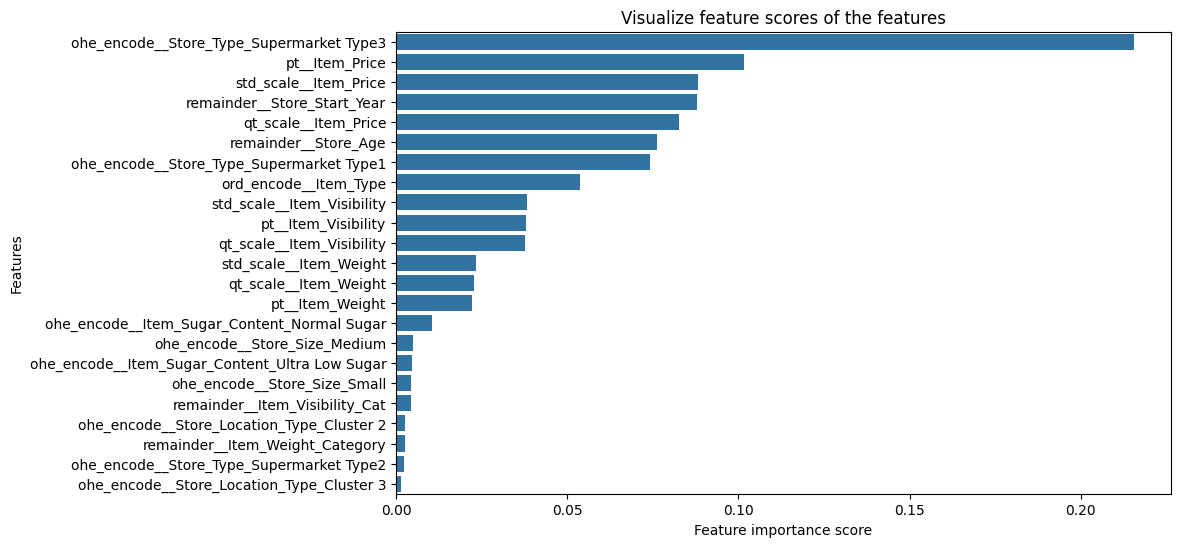

In [54]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

We would also try feature importance with krr as that is currently our best model, now we would find out the features that are doing better with both models or not doing so well in both models


In [55]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

def kernel_ridge_feature_importance(X, y, kernel='rbf', alpha=1.0, gamma=None, n_repeats=10, random_state=None):

    # Set default gamma if not provided
    if gamma is None:
        gamma = 1.0 / X.shape[1]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Kernel Ridge model
    krr = KernelRidge(kernel=kernel, alpha=alpha, gamma=gamma)
    krr.fit(X_train, y_train)

    # Calculate baseline score (negative MSE)
    baseline_score = -mean_squared_error(y_test, krr.predict(X_test))

    # Initialize importance arrays
    n_features = X.shape[1]
    importances = np.zeros(n_features)
    importances_std = np.zeros(n_features)

    # Calculate permutation importance for each feature
    for feature_idx in tqdm(range(n_features), desc="Calculating feature importance"):
        feature_scores = []

        for _ in range(n_repeats):
            # Create permuted test set for this feature
            X_test_permuted = X_test.copy()
            np.random.shuffle(X_test_permuted[:, feature_idx])

            # Calculate score with permuted feature
            permuted_score = -mean_squared_error(y_test, krr.predict(X_test_permuted))

            # Importance is difference from baseline
            feature_scores.append(baseline_score - permuted_score)

        importances[feature_idx] = np.mean(feature_scores)
        importances_std[feature_idx] = np.std(feature_scores)

    return {
        'importances': importances,
        'importances_std': importances_std,
        'baseline_score': baseline_score
    }



Calculating feature importance: 100%|██████████| 23/23 [00:40<00:00,  1.75s/it]


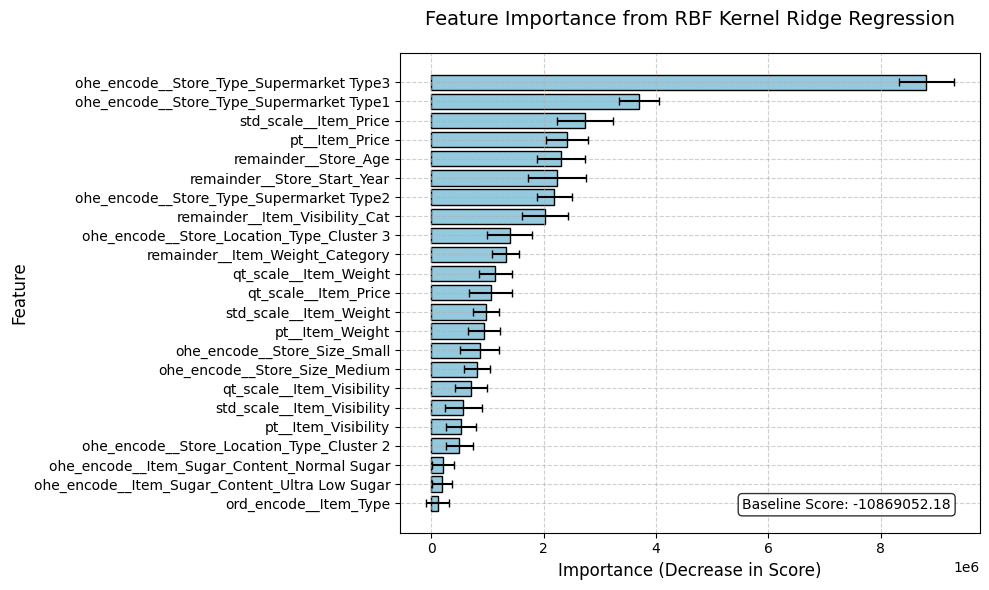

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_krr_feature_importance(results, feature_names=None, title="Feature Importance from Kernel Ridge Regression"):

    # Set up figure
    plt.figure(figsize=(10, 6))

    # Get feature names or indices
    n_features = len(results['importances'])
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(n_features)]

    # Create DataFrame for plotting
    importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': results['importances'],
        'Std': results['importances_std']
    })

    # Sort features by importance
    importances_df = importances_df.sort_values('Importance', ascending=False)

    # Create bar plot
    ax = sns.barplot(
        x='Importance',
        y='Feature',
        data=importances_df,
        color='skyblue',
        edgecolor='black'
    )

    # Add error bars
    ax.errorbar(
        x=importances_df['Importance'],
        y=importances_df['Feature'],
        xerr=importances_df['Std'],
        fmt='none',
        color='black',
        capsize=3
    )

    # Add labels and title
    plt.xlabel('Importance (Decrease in Score)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(title, fontsize=14, pad=20)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add baseline score annotation
    plt.annotate(
        f'Baseline Score: {results["baseline_score"]:.2f}',
        xy=(0.95, 0.05),
        xycoords='axes fraction',
        ha='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    plt.tight_layout()
    plt.show()

# Complete example with plotting
if __name__ == "__main__":
    import pandas as pd
    from sklearn.datasets import make_regression



    # Create feature names
    feature_names = X_train.columns
    #|[f'X{i}' for i in range(X_train.shape[1])]

    # Calculate feature importance
    results = kernel_ridge_feature_importance(
        X_train, y_train,
        kernel='rbf',
        alpha=0.1,
        gamma=0.1,
        n_repeats=20,
        random_state=42
    )

    # Plot results
    plot_krr_feature_importance(
        results,
        feature_names=feature_names,
        title="Feature Importance from RBF Kernel Ridge Regression"
    )

# Stacking

In [57]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
  def __init__(self, models):
    self.models = models

  def fit(self, X, y):
    self.models_ = [clone(x) for x in self.models]

    for model in self.models_:
      model.fit(X, y)

  def predict(self, X):
    predictions = np.column_stack([model.predict(X) for model in self.models_])
    return np.mean(predictions, axis=1)

In [58]:
averaged_models = AveragingModels(models=(lasso, Enet, KRR, Gboost, xgboost, lightgbm))

score = rmse(averaged_models)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23

In [59]:
estimators = [ ('elastic_net', Enet), ('kernel_ridge', KRR),('xgb_regressor', xgboost) ]

n_jobs = -1 # Define n_jobs

stack = StackingRegressor(estimators=estimators, final_estimator= lasso, cv= 5, n_jobs= n_jobs, passthrough = True)

stack.fit(X_train, y_train)

rmse(stack)

RMSE: 2998.569752


np.float64(2998.569751774368)

# Hyperparamater Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution
param_grid_krr = {
    'alpha': [0.1, 0.6, 1.0, 0.2, 0.5],
    'kernel': ['polynomial', 'rbf'],
    'degree': [2, 3, 4],
    'coef0': [1.0, 2.5, 3.0, 5.0, 7.0]
}


# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(KernelRidge(), param_grid_krr, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))

# You can now use the best model
best_krr_model_random = random_search.best_estimator_

In [ ]:
rmse(best_krr_model_random)

# Neural Network

In [ ]:
# Common Imports
import keras
import numpy as np

# Data Imports
import pandas as pd

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Data Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model
from keras import layers
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Initialize the neural network
model_name = "NeuralNetwork"
net = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
net.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate = 1e-3)
)

# Train the Neural Network
net.fit(
    X_train, y_train,
    epochs = 20,
#     verbose = 0
)

In [ ]:
train_pred = net.predict(X_train, verbose = 0)
test_pred = net.predict(X_test, verbose = 0)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Print the appended results
print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

In [ ]:
rmse(net)

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasRegressor # Import KerasRegressor from scikeras
import numpy as np


# Function to create the Neural Network model
def build_nn_model(n_hidden_layers=1, n_neurons=32, learning_rate=0.001):
    model = keras.Sequential()
    # Add input layer and first hidden layer
    model.add(layers.Dense(n_neurons, activation='relu', input_shape=[X_train.shape[1]]))

    # Add additional hidden layers
    for _ in range(n_hidden_layers - 1):
        model.add(layers.Dense(n_neurons, activation='relu'))

    # Add output layer
    model.add(layers.Dense(1))

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model


# Define the parameter grid for the Neural Network
param_grid_nn = {
    'n_hidden_layers': [3, 5, 7],
    'n_neurons': [32, 64],
    'learning_rate': [0.001, 0.005, 0.01],
    'epochs': [20, 50], # Epochs are treated as a parameter to tune
    'batch_size': [32, 64], # Batch size is treated as a parameter to tune
}

# Create the KerasRegressor wrapper
nn_regressor = KerasRegressor(model=build_nn_model, n_hidden_layers=1,
                              n_neurons=32,
                              learning_rate=0.001, verbose=1) # verbose=0 to suppress training output

# Instantiate GridSearchCV with the KerasRegressor and parameter grid
grid_search_nn = GridSearchCV(nn_regressor, param_grid_nn, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search_nn.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best RMSE for Neural Network:", np.sqrt(-grid_search_nn.best_score_))

# You can now use the best Neural Network model
best_nn_model = grid_search_nn.best_estimator_

In [ ]:
rmse(best_nn_model)

In [ ]:
test_predictions = best_nn_model.predict(test2)

In [ ]:
submission_df = pd.DataFrame(test_predictions, columns=['Item_Store_Returns'])
submission_df['Item_Store_ID'] = test['Item_ID'] + '_' + test['Store_ID']
submission_df = submission_df[['Item_Store_ID', 'Item_Store_Returns']]
submission_df.head()

In [ ]:
submission_df.to_csv('impact_stores8_submission.csv', index=False)

In [ ]:
!pip install --upgrade scikeras scikit-learn